In [1]:
from src.thickness_dataset import ThicknessDataset, ToTensor
from src.models import U_Net
from src.trainer import Trainer

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torch import nn

In [2]:
train_split = 0.7
valid_split = 0.1

PATH = "data\gen_data_6000"
thickness_dataset = ThicknessDataset(PATH, transform=ToTensor())

train_size = int(train_split * len(thickness_dataset))
valid_size = int(valid_split * len(thickness_dataset))
test_size = len(thickness_dataset) - (train_size+valid_size)
train_dataset,valid_dataset ,test_dataset = torch.utils.data.random_split(thickness_dataset, [train_size, valid_size, test_size], generator=torch.Generator().manual_seed(42))

batch_size = 16

train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [3]:
path = "models/model_20230224-225346_241"
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

model = U_Net()

criterion = nn.MSELoss()
model = model.to(device)
model.load_state_dict(torch.load(path))
model.eval()
trained_model = model

Using cuda device


In [5]:
# get accuracy of test set
total = 0
correct = 0
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data['img'].to(device, dtype=torch.float), data['thick_map'].to(device, dtype=torch.float)
        outputs = trained_model(images)
        total += labels.size(0)
        correct += (outputs == labels).sum().item()

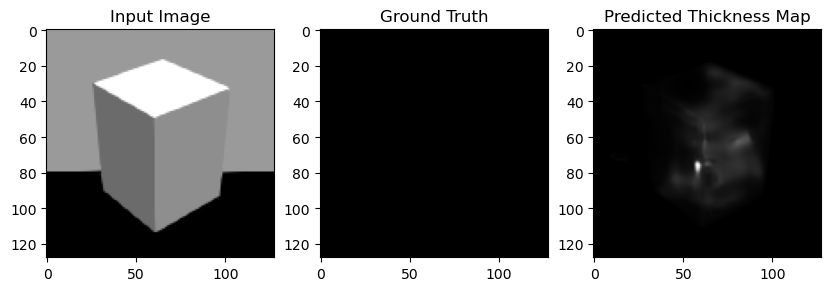

{'cam_pos': tensor([-1.4921,  1.2885, -1.3183]), 'catagory': 'dishwasher,dish washer,dishwashing machine', 'model_id': 'cc244af17335b1af52f4523ded466b8c', 'sample_no': 'frame_1', 'depth_map': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 'thick_map': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 'img': tensor([[[135, 135, 135,  ..., 135, 135, 135],
         [135, 135, 135,  ..., 135, 135, 135],
         [135, 135, 135,  ..., 135, 135, 135],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0

In [41]:
# test visualisation
idx = 6

with torch.no_grad():
    data = test_dataset[idx]
    image, label = data['img'].to(device, dtype=torch.float), data['thick_map'].to(device, dtype=torch.float)
    output = trained_model(image.reshape(1,3,128,128))
    image = image.cpu().numpy()
    label = label.cpu().numpy()
    output = output.cpu().numpy()

    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.imshow(image[0], cmap='gray')
    plt.title('Input Image')
    plt.subplot(1,3,2)
    plt.imshow(label[0], cmap='gray')
    plt.title('Ground Truth')
    plt.subplot(1,3,3)
    plt.imshow(output[0].reshape(128,128), cmap='gray')
    plt.title('Predicted Thickness Map')
    plt.show()
data = test_dataset[idx]
print(data)


In [22]:
print(label[0].shape)

(128, 128)
